<font> Turns out we can also solve cart-pole with hill-climbing algorithm </font>

<font> Artificial intelligence: A moder apparoach chapter 4, (see also simulated annealing)</font>

<font> Inspired from Udaciy Deep RL course </font>

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class hillClimbing():
    def __init__(self, state_size = 4, action_size = 2, init_factor = 1e-4):
        self.w = init_factor * (np.random.rand(action_size, state_size))
    
    def get_action(self, state):
        vals = np.dot(self.w, state)
        return np.argmax(vals)

 Mean score : 445.965 at episode : 199  

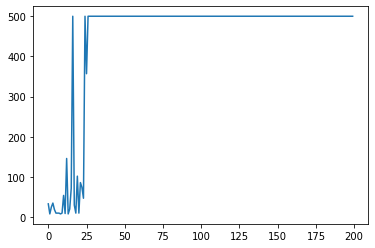

In [48]:
env = gym.make("CartPole-v1")

env.seed(42)
np.random.seed(42)


agent = hillClimbing()
rewards = []
best_weights = agent.w.copy()

def train(episodes = 10, max_it = 500, noise_scale = 1e-3):
    best_score = 0
    for i in range(episodes):
        obs = env.reset()
        score = 0
        action = env.action_space.sample()
        it = 0
        
        while(it < max_it):
            obs, reward, done, info = env.step(action)
            score += reward
            action = agent.get_action(obs.reshape((4, 1)))
            it += 1
            if(done):
                break
        rewards.append(score)
        score = sum(rewards[-200:])/min(200, len(rewards))
        if(best_score <= score):
            best_score = score
            best_weights = agent.w.copy()
            noise_scale = max(1e-3, noise_scale/2)
            agent.w += noise_scale * (np.random.rand(*agent.w.shape) - 0.5)
        else:
            noise_scale  = min(1, noise_scale * 2)
            agent.w = best_weights.copy() + noise_scale * (np.random.rand(*agent.w.shape) - 0.5)

        print("\r Mean score : {:.3f} at episode : {}  ".format(sum(rewards[-200:])/min(200, len(rewards)), i), end="")
    return best_score
score = train(episodes=200)
plt.plot(rewards)

In [49]:
env.reset()
done = False
action = env.action_space.sample()
rewards = 0
# agent.w = best_weights.copy()
while(not done):
    obs, reward, done, info = env.step(action)
    rewards += reward
    action = agent.get_action(obs.reshape((4, 1)))
    env.render()
env.close()
print(rewards)

500.0
